In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.constants as const
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [119]:
df = pd.read_csv("Data.csv")
temp = df.columns
df.columns = ["C(мФ)","R(Ом)","f(КГц)"]
df


,C(мФ),R(Ом),f(КГц)
0,1.00,10,16.00
1,1.00,15,11.00
2,1.00,25,7.00
3,1.00,50,3.60
4,1.00,75,2.30
5,1.00,100,1.60
6,1.00,150,1.00
7,1.00,200,0.83
8,2.20,10,7.60
9,2.20,15,5.10


In [120]:
df.columns = temp

In [121]:
df.C = df.apply(lambda row: row.C * 10**-6, axis=1)
df.f = df.apply(lambda row: row.f * 10**3, axis=1)

In [122]:
df['X'] = np.divide(np.ones(len(df)), 2 * const.pi * np.multiply(df.f, df.C))
df['fTeor'] = 1 / (2 * const.pi * np.multiply(df.R, df.C))
df['phi'] = -1 * np.arctan(np.divide(df.X, np.full((len(df)),50)))
df['df'] = np.abs(np.subtract(df.f, df.fTeor))
df['e'] = np.divide(df.df, df.fTeor) * 100
df

,C,R,f,X,fTeor,phi,df,e
0,0.00,10,"16,000.00",9.95,"15,915.49",-0.20,84.51,0.53
1,0.00,15,"11,000.00",14.47,"10,610.33",-0.28,389.67,3.67
2,0.00,25,"7,000.00",22.74,"6,366.20",-0.43,633.80,9.96
3,0.00,50,"3,600.00",44.21,"3,183.10",-0.72,416.90,13.10
4,0.00,75,"2,300.00",69.20,"2,122.07",-0.95,177.93,8.38
5,0.00,100,"1,600.00",99.47,"1,591.55",-1.11,8.45,0.53
6,0.00,150,"1,000.00",159.15,"1,061.03",-1.27,61.03,5.75
7,0.00,200,830.00,191.75,795.77,-1.32,34.23,4.30
8,0.00,10,"7,600.00",9.52,"7,234.32",-0.19,365.68,5.05
9,0.00,15,"5,100.00",14.18,"4,822.88",-0.28,277.12,5.75


In [123]:
df.C = df.apply(lambda row: row.C * 10**6, axis=1)
df.f = df.apply(lambda row: row.f * 10**-3, axis=1)
df.fTeor = df.apply(lambda row: row.fTeor * 10**-3, axis=1)
df.df = df.apply(lambda row: row.df * 10**-3, axis=1)

In [125]:
dfirst = df[df.C == 1]
dfirst

,C,R,f,X,fTeor,phi,df,e
0,1.00,10,16.00,9.95,15.92,-0.20,0.08,0.53
1,1.00,15,11.00,14.47,10.61,-0.28,0.39,3.67
2,1.00,25,7.00,22.74,6.37,-0.43,0.63,9.96
3,1.00,50,3.60,44.21,3.18,-0.72,0.42,13.10
4,1.00,75,2.30,69.20,2.12,-0.95,0.18,8.38
5,1.00,100,1.60,99.47,1.59,-1.11,0.01,0.53
6,1.00,150,1.00,159.15,1.06,-1.27,0.06,5.75
7,1.00,200,0.83,191.75,0.80,-1.32,0.03,4.30


In [169]:
dsecond = df[df.C == 2.2]
dsecond

,C,R,f,X,fTeor,phi,df,e
8,2.20,10,7.60,9.52,7.23,-0.19,0.37,5.05
9,2.20,15,5.10,14.18,4.82,-0.28,0.28,5.75
10,2.20,25,3.20,22.61,2.89,-0.42,0.31,10.58
11,2.20,50,1.54,46.98,1.45,-0.75,0.09,6.44
12,2.20,75,1.00,72.34,0.96,-0.97,0.04,3.67
13,2.20,100,0.80,90.43,0.72,-1.07,0.08,10.58
14,2.20,150,0.51,141.85,0.48,-1.23,0.03,5.75
15,2.20,200,0.39,185.50,0.36,-1.31,0.03,7.82


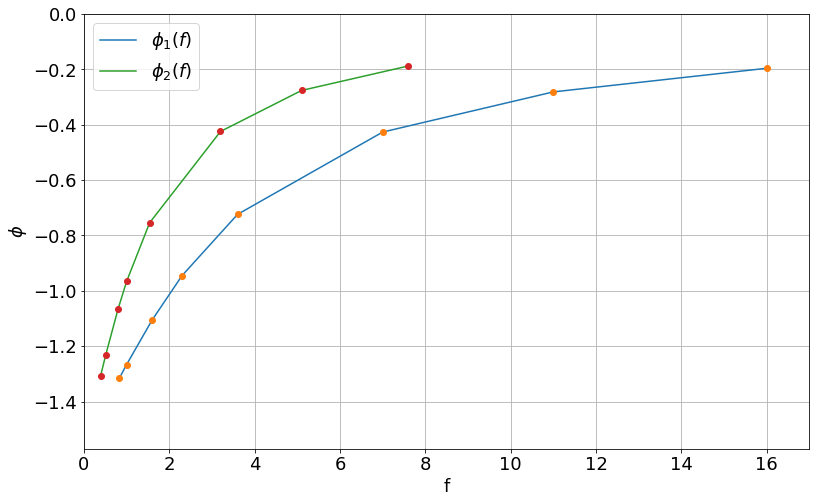

In [174]:
plt.figure(figsize = (13,8))
plt.ylabel(r"$\phi$")
plt.rc('font', size=18)
plt.xlabel("f")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(-const.pi / 2, 0)
#plt.yticks([-const.pi/2, -const.pi/3, -const.pi/4,  -const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.phi, '-', label = r"$\phi_1(f)$")
plt.plot(dfirst.f, dfirst.phi, 'o')
plt.plot(dsecond.f, dsecond.phi, '-', label = r"$\phi_2(f)$")
plt.plot(dsecond.f, dsecond.phi, 'o')
plt.legend(loc="best");

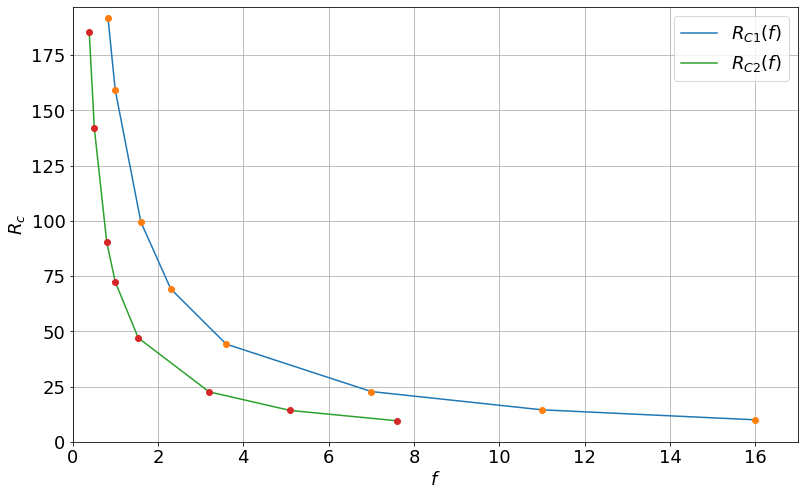

In [178]:
plt.figure(figsize = (13,8))
plt.ylabel(r"$R_c$")
plt.rc('font', size=18)
plt.xlabel("$f$")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(0, np.max(df.X) + 5)
#plt.yticks([-const.pi/2, -const.pi/3, -const.pi/4,  -const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.X, '-', label = r"$R_{C1}(f)$")
plt.plot(dfirst.f, dfirst.X, 'o')
plt.plot(dsecond.f, dsecond.X, '-', label = r"$R_{C2}(f)$")
plt.plot(dsecond.f, dsecond.X, 'o')
plt.legend(loc="best");